# Irisデータの分類

# 【問題1 データセットを読み込んで、どのような値が入っているか確認】

In [3]:
# データセットの確認
from sklearn.datasets import load_iris
iris = load_iris() 
#dirを使って確認。
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

##### データセットには['DESCR', 'data', 'feature_names', 'target', 'target_names']が入っているとわかる

# 【問題2 各値を参照してみる】

In [4]:
# DESCRの取得
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

↑データセットの解説が入ってる。

In [7]:
# dataの取得
print(iris.data[0])

[5.1 3.5 1.4 0.2]


↑謎の4つの数字が大量に出てきた。




In [5]:
iris.data.shape

(150, 4)

↑データの形式を調べると150行4列あるみたい。<br>
DESCRの解説をみるかぎり、150個の花のデータを意味していると推察される。

In [6]:
# feature_namesの取得
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

iris.dataの中身は、
[a, b, c, d]と数字があったときに、<br>
a : sepal legnth (花びら縦長) [cm]<br>
b : sepal width  (花びら幅長) [cm]<br>
c : petal length  (がくへん縦長)<br>
d : petal width   (がくへん幅長)<br>
を表しているよう。

In [8]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


↑0 / 1 / 2 の数字の羅列が出てきた・・・

In [9]:
iris.target.shape

(150,)

↑データの数はやっぱり150。<br>
数字は 0 / 1 / 2 の3種類で、たしか3種類のアヤメのデータを分類する問題だったから、アヤメの種類を表してる？？？

In [11]:
# target_namesの確認
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

↑どうやら iris.targetの数字はそれぞれ<br>
0 : setosa (セトサ；ヒオウギアヤメ)<br>
1 : versicolor (ヴァーシカラー)<br>
2 : virginica (ヴァージニカ)<br>
を表しているよう。

# モデル作り

# 【問題3 まずはトレーニングデータとテストデータに分ける】

In [12]:
from sklearn.model_selection import train_test_split

# random_state=1

x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.25, random_state = 5)

# 【問題4 どれくらいに分けられているか確認する】

In [13]:
x_train.shape

(112, 4)

In [14]:
x_test.shape

(38, 4)

# 【問題5 どれくらいに分けられているか確認する】

### 全部で150個あったデータが112個と、38個に分けられていたことがわかる
### y_trainとy_testも同様

In [15]:
len(y_train)

112

In [16]:
len(y_test)

38

In [17]:
150 * 0.25

37.5

# 【問題5 値を確認してみる】 

In [18]:
print(y_train)

[0 2 2 1 0 0 1 2 1 2 2 0 2 0 0 0 0 1 1 1 1 2 1 2 2 1 0 1 0 1 2 1 2 1 2 1 1
 1 2 1 0 2 0 0 1 0 0 2 1 0 2 0 2 1 0 0 2 1 1 0 0 2 1 1 0 1 2 1 0 1 2 2 2 2
 0 0 1 2 0 1 0 0 2 1 2 0 2 0 2 0 1 0 2 2 0 2 2 2 1 0 1 0 0 1 2 0 2 0 1 2 2
 1]


# 【問題6 ロジスティック回帰を用いてモデル作り】 

In [20]:
import warnings
warnings.filterwarnings("ignore")

# ロジスティック回帰の選択
from sklearn.linear_model import LogisticRegression
# 学習
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

# 【問題7 正解率判定】

In [21]:
pred = model.predict(x_test)
pred

array([1, 2, 2, 0, 2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2])

In [23]:
x_test[0]

array([5.8, 2.7, 3.9, 1.2])

# y_testとpredict_yの違い

In [24]:
# y_test # 本当の値
y_test

array([1, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2])

In [25]:
pred

array([1, 2, 2, 0, 2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2])

### 正解率を見てみましょう

In [26]:
#accuracy_scoreで正解率が見えます
from sklearn.metrics import accuracy_score
# 第一引数に本当の値、第二引数に予測値を渡す
accuracy_score(y_test, pred)

0.9736842105263158

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)

In [28]:
cm

array([[12,  0,  0],
       [ 0, 13,  1],
       [ 0,  0, 12]])

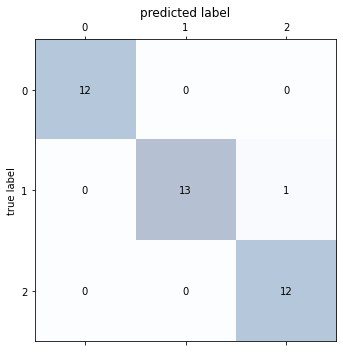

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.title('predicted label')
plt.ylabel('true label')
plt.tight_layout() # ラベルが重ならないように自動調整
plt.show()

In [31]:
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

iris = load_iris()
model = LogisticRegression()
#kfold = KFold(n_splits=3)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
print("cross validation score:\n{}".format(cross_val_score(model ,iris.data,iris.target,cv=kfold)))

cross validation score:
[0.96 0.98 0.94]
